In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df=pd.read_csv(r"D:\Ecommerce\co2 emmisions\CO2 Emissions_Canada.csv")

In [3]:
df.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                           33                  196  
1                           29                  221  
2                           48                  136  
3                           25                  255  
4                           27                  244

# lets check if any value is missing or not

In [4]:
missing=df.isnull()
print(missing)

       Make  Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0     False  False          False           False      False         False   
1     False  False          False           False      False         False   
2     False  False          False           False      False         False   
3     False  False          False           False      False         False   
4     False  False          False           False      False         False   
...     ...    ...            ...             ...        ...           ...   
7380  False  False          False           False      False         False   
7381  False  False          False           False      False         False   
7382  False  False          False           False      False         False   
7383  False  False          False           False      False         False   
7384  False  False          False           False      False         False   

      Fuel Type  Fuel Consumption City (L/100 km)  \
0         

In [5]:
df
Df=df

# hence no value is missing

# now our next target is feature selection

In [6]:
#i will be using filter methods for feature selection

In [7]:
#before proceeding to filter methods we need to change string data into numerical data
#more commonly known as converting to dummy variables

In [8]:
#lets first obtain the unique values in every column
maker=df['Make'].unique()
print(maker)
print(maker.shape)

['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']
(42,)


In [9]:
#adding 42 extra features will lead to unncessary problems and we can drop this column of makers
df=pd.get_dummies(df,columns=['Make'],prefix="Make")
df.head()

Model Vehicle Class  Engine Size(L)  Cylinders Transmission Fuel Type  \
0         ILX       COMPACT             2.0          4          AS5         Z   
1         ILX       COMPACT             2.4          4           M6         Z   
2  ILX HYBRID       COMPACT             1.5          4          AV7         Z   
3     MDX 4WD   SUV - SMALL             3.5          6          AS6         Z   
4     RDX AWD   SUV - SMALL             3.5          6          AS6         Z   

   Fuel Consumption City (L/100 km)  Fuel Consumption Hwy (L/100 km)  \
0                               9.9                              6.7   
1                              11.2                              7.7   
2                               6.0                              5.8   
3                              12.7                              9.1   
4                              12.1                              8.7   

   Fuel Consumption Comb (L/100 km)  Fuel Consumption Comb (mpg)  ...  \
0                               8.5                           33  ...   
1                               9.6                           29  ...   
2                               5.9                           48  ...   
3                              11.1                           25  ...   
4                              10.6                           27  ...   

   Make_PORSCHE  Make_RAM  Make_ROLLS-ROYCE  Make_SCION  Make_SMART  Make_SRT  \
0             0         0                 0           0           0         0   
1             0         0                 0           0           0         0   
2             0         0                 0           0           0         0   
3             0         0                 0           0           0         0   
4             0         0                 0           0           0         0   

   Make_SUBARU  Make_TOYOTA  Make_VOLKSWAGEN  Make_VOLVO  
0            0            0                0           0  
1            0            0                0           0  
2            0            0                0           0  
3            0            0                0           0  
4            0            0                0           0  

[5 rows x 53 columns]

In [10]:
models=df["Model"].unique()
print(models)

['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD']


In [11]:
length=models.shape
length

(2053,)

In [12]:
#this makes this column useless for our analysis
#from here onwards i will be making changes in df and hence my original dataset will be safe as in Df
df=df.drop(columns=["Model"])

In [13]:
df.head()

Vehicle Class  Engine Size(L)  Cylinders Transmission Fuel Type  \
0       COMPACT             2.0          4          AS5         Z   
1       COMPACT             2.4          4           M6         Z   
2       COMPACT             1.5          4          AV7         Z   
3   SUV - SMALL             3.5          6          AS6         Z   
4   SUV - SMALL             3.5          6          AS6         Z   

   Fuel Consumption City (L/100 km)  Fuel Consumption Hwy (L/100 km)  \
0                               9.9                              6.7   
1                              11.2                              7.7   
2                               6.0                              5.8   
3                              12.7                              9.1   
4                              12.1                              8.7   

   Fuel Consumption Comb (L/100 km)  Fuel Consumption Comb (mpg)  \
0                               8.5                           33   
1                               9.6                           29   
2                               5.9                           48   
3                              11.1                           25   
4                              10.6                           27   

   CO2 Emissions(g/km)  ...  Make_PORSCHE  Make_RAM  Make_ROLLS-ROYCE  \
0                  196  ...             0         0                 0   
1                  221  ...             0         0                 0   
2                  136  ...             0         0                 0   
3                  255  ...             0         0                 0   
4                  244  ...             0         0                 0   

   Make_SCION  Make_SMART  Make_SRT  Make_SUBARU  Make_TOYOTA  \
0           0           0         0            0            0   
1           0           0         0            0            0   
2           0           0         0            0            0   
3           0           0         0            0            0   
4           0           0         0            0            0   

   Make_VOLKSWAGEN  Make_VOLVO  
0                0           0  
1                0           0  
2                0           0  
3                0           0  
4                0           0  

[5 rows x 52 columns]

In [14]:
veh_class=df["Vehicle Class"].unique()
print(veh_class)

['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']


In [15]:
veh_class.shape

(16,)

In [16]:
transmission=df["Transmission"].unique()
print(transmission)

['AS5' 'M6' 'AV7' 'AS6' 'AM6' 'A6' 'AM7' 'AV8' 'AS8' 'A7' 'A8' 'M7' 'A4'
 'M5' 'AV' 'A5' 'AS7' 'A9' 'AS9' 'AV6' 'AS4' 'AM5' 'AM8' 'AM9' 'AS10'
 'A10' 'AV10']


In [17]:
print(transmission.shape)

(27,)


In [18]:
fuel=df["Fuel Type"].unique()
print(fuel)

['Z' 'D' 'X' 'E' 'N']


In [19]:
print(fuel.shape)

(5,)


In [20]:
df=pd.get_dummies(df,columns=['Vehicle Class'],prefix="Vehicle")

In [21]:

df.head()

Engine Size(L)  Cylinders Transmission Fuel Type  \
0             2.0          4          AS5         Z   
1             2.4          4           M6         Z   
2             1.5          4          AV7         Z   
3             3.5          6          AS6         Z   
4             3.5          6          AS6         Z   

   Fuel Consumption City (L/100 km)  Fuel Consumption Hwy (L/100 km)  \
0                               9.9                              6.7   
1                              11.2                              7.7   
2                               6.0                              5.8   
3                              12.7                              9.1   
4                              12.1                              8.7   

   Fuel Consumption Comb (L/100 km)  Fuel Consumption Comb (mpg)  \
0                               8.5                           33   
1                               9.6                           29   
2                               5.9                           48   
3                              11.1                           25   
4                              10.6                           27   

   CO2 Emissions(g/km)  Make_ACURA  ...  Vehicle_PICKUP TRUCK - STANDARD  \
0                  196           1  ...                                0   
1                  221           1  ...                                0   
2                  136           1  ...                                0   
3                  255           1  ...                                0   
4                  244           1  ...                                0   

   Vehicle_SPECIAL PURPOSE VEHICLE  Vehicle_STATION WAGON - MID-SIZE  \
0                                0                                 0   
1                                0                                 0   
2                                0                                 0   
3                                0                                 0   
4                                0                                 0   

   Vehicle_STATION WAGON - SMALL  Vehicle_SUBCOMPACT  Vehicle_SUV - SMALL  \
0                              0                   0                    0   
1                              0                   0                    0   
2                              0                   0                    0   
3                              0                   0                    1   
4                              0                   0                    1   

   Vehicle_SUV - STANDARD  Vehicle_TWO-SEATER  Vehicle_VAN - CARGO  \
0                       0                   0                    0   
1                       0                   0                    0   
2                       0                   0                    0   
3                       0                   0                    0   
4                       0                   0                    0   

   Vehicle_VAN - PASSENGER  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 67 columns]

In [22]:
df=pd.get_dummies(df,columns=['Transmission'],prefix="Transmission")
df.head()

Engine Size(L)  Cylinders Fuel Type  Fuel Consumption City (L/100 km)  \
0             2.0          4         Z                               9.9   
1             2.4          4         Z                              11.2   
2             1.5          4         Z                               6.0   
3             3.5          6         Z                              12.7   
4             3.5          6         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  Make_ACURA  \
0                           33                  196           1   
1                           29                  221           1   
2                           48                  136           1   
3                           25                  255           1   
4                           27                  244           1   

   Make_ALFA ROMEO  ...  Transmission_AS8  Transmission_AS9  Transmission_AV  \
0                0  ...                 0                 0                0   
1                0  ...                 0                 0                0   
2                0  ...                 0                 0                0   
3                0  ...                 0                 0                0   
4                0  ...                 0                 0                0   

   Transmission_AV10  Transmission_AV6  Transmission_AV7  Transmission_AV8  \
0                  0                 0                 0                 0   
1                  0                 0                 0                 0   
2                  0                 0                 1                 0   
3                  0                 0                 0                 0   
4                  0                 0                 0                 0   

   Transmission_M5  Transmission_M6  Transmission_M7  
0                0                0                0  
1                0                1                0  
2                0                0                0  
3                0                0                0  
4                0                0                0  

[5 rows x 93 columns]

In [23]:
df=pd.get_dummies(df,columns=['Fuel Type'],prefix="Fuel Type")
df.head()

Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
0             2.0          4                               9.9   
1             2.4          4                              11.2   
2             1.5          4                               6.0   
3             3.5          6                              12.7   
4             3.5          6                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  Make_ACURA  \
0                           33                  196           1   
1                           29                  221           1   
2                           48                  136           1   
3                           25                  255           1   
4                           27                  244           1   

   Make_ALFA ROMEO  Make_ASTON MARTIN  ...  Transmission_AV7  \
0                0                  0  ...                 0   
1                0                  0  ...                 0   
2                0                  0  ...                 1   
3                0                  0  ...                 0   
4                0                  0  ...                 0   

   Transmission_AV8  Transmission_M5  Transmission_M6  Transmission_M7  \
0                 0                0                0                0   
1                 0                0                1                0   
2                 0                0                0                0   
3                 0                0                0                0   
4                 0                0                0                0   

   Fuel Type_D  Fuel Type_E  Fuel Type_N  Fuel Type_X  Fuel Type_Z  
0            0            0            0            0            1  
1            0            0            0            0            1  
2            0            0            0            0            1  
3            0            0            0            0            1  
4            0            0            0            0            1  

[5 rows x 97 columns]

In [24]:
y=df["CO2 Emissions(g/km)"]
print(y)
df=df.drop(columns=["CO2 Emissions(g/km)"])
df.head()


0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: CO2 Emissions(g/km), Length: 7385, dtype: int64


Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
0             2.0          4                               9.9   
1             2.4          4                              11.2   
2             1.5          4                               6.0   
3             3.5          6                              12.7   
4             3.5          6                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb (mpg)  Make_ACURA  Make_ALFA ROMEO  \
0                           33           1                0   
1                           29           1                0   
2                           48           1                0   
3                           25           1                0   
4                           27           1                0   

   Make_ASTON MARTIN  Make_AUDI  ...  Transmission_AV7  Transmission_AV8  \
0                  0          0  ...                 0                 0   
1                  0          0  ...                 0                 0   
2                  0          0  ...                 1                 0   
3                  0          0  ...                 0                 0   
4                  0          0  ...                 0                 0   

   Transmission_M5  Transmission_M6  Transmission_M7  Fuel Type_D  \
0                0                0                0            0   
1                0                1                0            0   
2                0                0                0            0   
3                0                0                0            0   
4                0                0                0            0   

   Fuel Type_E  Fuel Type_N  Fuel Type_X  Fuel Type_Z  
0            0            0            0            1  
1            0            0            0            1  
2            0            0            0            1  
3            0            0            0            1  
4            0            0            0            1  

[5 rows x 96 columns]

In [25]:
X=df

In [26]:
X.head()

Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
0             2.0          4                               9.9   
1             2.4          4                              11.2   
2             1.5          4                               6.0   
3             3.5          6                              12.7   
4             3.5          6                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb (mpg)  Make_ACURA  Make_ALFA ROMEO  \
0                           33           1                0   
1                           29           1                0   
2                           48           1                0   
3                           25           1                0   
4                           27           1                0   

   Make_ASTON MARTIN  Make_AUDI  ...  Transmission_AV7  Transmission_AV8  \
0                  0          0  ...                 0                 0   
1                  0          0  ...                 0                 0   
2                  0          0  ...                 1                 0   
3                  0          0  ...                 0                 0   
4                  0          0  ...                 0                 0   

   Transmission_M5  Transmission_M6  Transmission_M7  Fuel Type_D  \
0                0                0                0            0   
1                0                1                0            0   
2                0                0                0            0   
3                0                0                0            0   
4                0                0                0            0   

   Fuel Type_E  Fuel Type_N  Fuel Type_X  Fuel Type_Z  
0            0            0            0            1  
1            0            0            0            1  
2            0            0            0            1  
3            0            0            0            1  
4            0            0            0            1  

[5 rows x 96 columns]

In [27]:
from sklearn.model_selection import train_test_split
X_train,Xtest,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train

Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
6590             3.0          6                              11.4   
6274             4.0          6                              14.7   
2251             3.0          6                              13.8   
3149             3.4          6                              11.3   
4362             2.0          4                              10.1   
...              ...        ...                               ...   
5191             2.0          4                              10.3   
5226             3.5          6                              10.6   
5390             3.5          6                              11.7   
860              2.5          4                               9.5   
7270             4.0          8                              13.4   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
6590                              8.1                               9.9   
6274                             10.3                              12.7   
2251                              9.0                              11.7   
3149                              7.9                               9.8   
4362                              7.0                               8.7   
...                               ...                               ...   
5191                              7.4                               9.0   
5226                              7.3                               9.1   
5390                              8.8                              10.4   
860                               7.4                               8.6   
7270                             10.1                              11.9   

      Fuel Consumption Comb (mpg)  Make_ACURA  Make_ALFA ROMEO  \
6590                           29           0                0   
6274                           22           0                0   
2251                           24           0                0   
3149                           29           0                0   
4362                           32           0                0   
...                           ...         ...              ...   
5191                           31           0                0   
5226                           31           0                0   
5390                           27           0                0   
860                            33           0                0   
7270                           24           0                0   

      Make_ASTON MARTIN  Make_AUDI  ...  Transmission_AV7  Transmission_AV8  \
6590                  0          0  ...                 0                 0   
6274                  0          0  ...                 0                 0   
2251                  0          1  ...                 0                 0   
3149                  0          0  ...                 0                 0   
4362                  0          0  ...                 0                 0   
...                 ...        ...  ...               ...               ...   
5191                  0          0  ...                 0                 0   
5226                  0          0  ...                 1                 0   
5390                  0          0  ...                 0                 0   
860                   0          0  ...                 0                 0   
7270                  0          0  ...                 0                 0   

      Transmission_M5  Transmission_M6  Transmission_M7  Fuel Type_D  \
6590                0                0                0            0   
6274                0                0                0            0   
2251                0                1                0            0   
3149                0                0                0            0   
4362                0                0                0            0   
...               ...              ...              ...          ...   
5191                0         

# feature selection

In [29]:
#now i will correlation matrix for selecting my features
corr_matr=X_train.corr()

In [30]:
print(corr_matr)

                                  Engine Size(L)  Cylinders  \
Engine Size(L)                          1.000000   0.927421   
Cylinders                               0.927421   1.000000   
Fuel Consumption City (L/100 km)        0.831957   0.802685   
Fuel Consumption Hwy (L/100 km)         0.759331   0.715812   
Fuel Consumption Comb (L/100 km)        0.816832   0.782241   
...                                          ...        ...   
Fuel Type_D                            -0.068075  -0.057628   
Fuel Type_E                             0.165263   0.120908   
Fuel Type_N                                  NaN        NaN   
Fuel Type_X                            -0.245188  -0.318359   
Fuel Type_Z                             0.195352   0.285442   

                                  Fuel Consumption City (L/100 km)  \
Engine Size(L)                                            0.831957   
Cylinders                                                 0.802685   
Fuel Consumption City (L/100 km) 

In [31]:
#lets build a heatmap
plt.figure(figsize=(100,100))
sns.heatmap(corr_matr,annot=True,linewidth=0.01)

<AxesSubplot:>

In [32]:
#now using scikit learn to eliminate the excessive features 
#performing feature selection

#intitilizing an empty set first
removing = set()
#setting a threshold at first
threshold=0.05
for i in range(len(corr_matr.columns)):
    for j in range(i):
        if abs(corr_matr.iloc[i,j])>threshold:
                col_name=corr_matr.columns[i]
                removing.add(col_name)
        

In [33]:
#now lets print the features which we are going to eliminate
print(removing)
print(len(removing))

{'Transmission_AS5', 'Make_MITSUBISHI', 'Fuel Type_E', 'Transmission_A9', 'Make_BMW', 'Vehicle_SUV - STANDARD', 'Make_LAND ROVER', 'Make_CHEVROLET', 'Make_SMART', 'Transmission_AV10', 'Transmission_AS10', 'Make_HYUNDAI', 'Make_RAM', 'Transmission_A5', 'Vehicle_PICKUP TRUCK - STANDARD', 'Make_MASERATI', 'Vehicle_MINICOMPACT', 'Make_ALFA ROMEO', 'Vehicle_MINIVAN', 'Transmission_AS9', 'Fuel Type_Z', 'Transmission_AM5', 'Make_LEXUS', 'Make_BENTLEY', 'Make_LAMBORGHINI', 'Transmission_AV', 'Make_PORSCHE', 'Make_VOLKSWAGEN', 'Make_MERCEDES-BENZ', 'Transmission_M6', 'Make_ASTON MARTIN', 'Make_CHRYSLER', 'Make_JEEP', 'Make_SCION', 'Transmission_A7', 'Vehicle_FULL-SIZE', 'Vehicle_SPECIAL PURPOSE VEHICLE', 'Vehicle_SUBCOMPACT', 'Transmission_AV7', 'Transmission_M7', 'Transmission_AM7', 'Make_BUGATTI', 'Transmission_AV6', 'Fuel Consumption City (L/100 km)', 'Vehicle_STATION WAGON - MID-SIZE', 'Make_MINI', 'Make_SUBARU', 'Make_TOYOTA', 'Make_FORD', 'Transmission_A8', 'Vehicle_SUV - SMALL', 'Make_DO

In [34]:
X_train=X_train.drop(columns=['Make_CHRYSLER', 'Fuel Type_D', 'Make_TOYOTA', 'Vehicle_SPECIAL PURPOSE VEHICLE', 'Make_BMW', 'Make_LAND ROVER', 
                     'Fuel Consumption Hwy (L/100 km)', 'Make_LEXUS', 'Transmission_AM7', 'Make_ASTON MARTIN', 'Transmission_AM8', 
                     'Transmission_M6', 'Make_PORSCHE', 'Make_NISSAN', 'Fuel Type_Z', 'Transmission_M7', 'Fuel Consumption Comb (L/100 km)', 
                     'Make_LAMBORGHINI', 'Make_ACURA', 'Make_CHEVROLET', 'Vehicle_COMPACT', 'Transmission_AM9', 'Fuel Type_E', 'Make_MAZDA', 
                     'Make_VOLVO', 'Make_BENTLEY', 'Transmission_A10', 'Transmission_A7', 'Vehicle_MINICOMPACT', 'Vehicle_VAN - CARGO', 
                     'Make_ROLLS-ROYCE', 'Fuel Consumption City (L/100 km)', 'Make_JEEP', 'Transmission_AM6', 'Vehicle_VAN - PASSENGER', 
                     'Transmission_A4', 'Make_SRT', 'Make_SUBARU', 'Make_DODGE', 'Make_BUGATTI', 'Transmission_AV8', 'Transmission_AV7', 'Vehicle_SUV - SMALL', 'Make_HYUNDAI', 'Transmission_AM5', 'Transmission_A8', 'Fuel Consumption Comb (mpg)', 'Fuel Type_X', 'Make_MASERATI', 'Transmission_AS7', 'Transmission_AS9', 'Transmission_AV10', 'Vehicle_PICKUP TRUCK - STANDARD',
                     'Make_MERCEDES-BENZ', 'Make_RAM', 'Make_HONDA', 'Transmission_AS10', 'Vehicle_STATION WAGON - SMALL', 'Transmission_AV', 
                     'Make_MITSUBISHI', 'Cylinders', 'Make_KIA', 'Transmission_AS6', 'Make_VOLKSWAGEN', 'Make_FORD', 'Vehicle_MINIVAN', 'Make_SMART', 'Vehicle_STATION WAGON - MID-SIZE', 'Make_SCION', 'Transmission_A6', 'Transmission_AS4', 'Transmission_AS8', 'Vehicle_FULL-SIZE', 'Vehicle_SUV - STANDARD', 'Make_GMC', 'Transmission_A5', 'Transmission_M5', 'Transmission_AV6', 'Vehicle_TWO-SEATER', 'Make_MINI', 'Vehicle_MID-SIZE', 'Make_FIAT', 'Vehicle_SUBCOMPACT', 'Vehicle_PICKUP TRUCK - SMALL', 'Make_ALFA ROMEO', 'Make_BUICK', 'Transmission_AS5', 'Transmission_A9'])

In [35]:
print(X_train)

      Engine Size(L)  Make_AUDI  Make_CADILLAC  Make_GENESIS  Make_INFINITI  \
6590             3.0          0              0             0              0   
6274             4.0          0              0             0              0   
2251             3.0          1              0             0              0   
3149             3.4          0              0             0              0   
4362             2.0          0              0             0              0   
...              ...        ...            ...           ...            ...   
5191             2.0          0              0             0              0   
5226             3.5          0              0             0              0   
5390             3.5          0              0             0              0   
860              2.5          0              0             0              0   
7270             4.0          0              0             0              0   

      Make_JAGUAR  Make_LINCOLN  Fuel Type_N  
6590

In [36]:
Xtest=Xtest.drop(columns=['Make_CHRYSLER', 'Fuel Type_D', 'Make_TOYOTA', 'Vehicle_SPECIAL PURPOSE VEHICLE', 'Make_BMW', 'Make_LAND ROVER', 
                     'Fuel Consumption Hwy (L/100 km)', 'Make_LEXUS', 'Transmission_AM7', 'Make_ASTON MARTIN', 'Transmission_AM8', 
                     'Transmission_M6', 'Make_PORSCHE', 'Make_NISSAN', 'Fuel Type_Z', 'Transmission_M7', 'Fuel Consumption Comb (L/100 km)', 
                     'Make_LAMBORGHINI', 'Make_ACURA', 'Make_CHEVROLET', 'Vehicle_COMPACT', 'Transmission_AM9', 'Fuel Type_E', 'Make_MAZDA', 
                     'Make_VOLVO', 'Make_BENTLEY', 'Transmission_A10', 'Transmission_A7', 'Vehicle_MINICOMPACT', 'Vehicle_VAN - CARGO', 
                     'Make_ROLLS-ROYCE', 'Fuel Consumption City (L/100 km)', 'Make_JEEP', 'Transmission_AM6', 'Vehicle_VAN - PASSENGER', 
                     'Transmission_A4', 'Make_SRT', 'Make_SUBARU', 'Make_DODGE', 'Make_BUGATTI', 'Transmission_AV8', 'Transmission_AV7', 'Vehicle_SUV - SMALL', 'Make_HYUNDAI', 'Transmission_AM5', 'Transmission_A8', 'Fuel Consumption Comb (mpg)', 'Fuel Type_X', 'Make_MASERATI', 'Transmission_AS7', 'Transmission_AS9', 'Transmission_AV10', 'Vehicle_PICKUP TRUCK - STANDARD',
                     'Make_MERCEDES-BENZ', 'Make_RAM', 'Make_HONDA', 'Transmission_AS10', 'Vehicle_STATION WAGON - SMALL', 'Transmission_AV', 
                     'Make_MITSUBISHI', 'Cylinders', 'Make_KIA', 'Transmission_AS6', 'Make_VOLKSWAGEN', 'Make_FORD', 'Vehicle_MINIVAN', 'Make_SMART', 'Vehicle_STATION WAGON - MID-SIZE', 'Make_SCION', 'Transmission_A6', 'Transmission_AS4', 'Transmission_AS8', 'Vehicle_FULL-SIZE', 'Vehicle_SUV - STANDARD', 'Make_GMC', 'Transmission_A5', 'Transmission_M5', 'Transmission_AV6', 'Vehicle_TWO-SEATER', 'Make_MINI', 'Vehicle_MID-SIZE', 'Make_FIAT', 'Vehicle_SUBCOMPACT', 'Vehicle_PICKUP TRUCK - SMALL', 'Make_ALFA ROMEO', 'Make_BUICK', 'Transmission_AS5', 'Transmission_A9'])

In [37]:
print(Xtest)

      Engine Size(L)  Make_AUDI  Make_CADILLAC  Make_GENESIS  Make_INFINITI  \
7261             3.0          0              0             0              0   
4489             4.4          0              0             0              0   
1539             6.2          0              0             0              0   
3532             5.3          0              0             0              0   
6418             4.0          0              0             0              0   
...              ...        ...            ...           ...            ...   
7185             2.0          0              0             0              0   
1740             2.0          0              0             0              0   
4609             1.4          0              0             0              0   
1844             3.5          0              0             0              0   
5154             2.0          0              0             0              0   

      Make_JAGUAR  Make_LINCOLN  Fuel Type_N  
7261

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [39]:
model=LinearRegression()

In [40]:
model.fit(X_train,y_train)

LinearRegression()

In [41]:
y_predict=model.predict(Xtest)

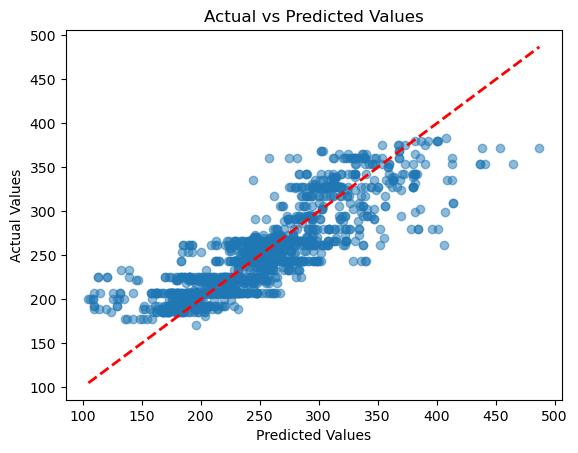

In [42]:
plt.scatter(y_test,y_predict,alpha=0.5)
plt.xlabel("Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)  # Diagonal line for comparison
plt.ylabel("Actual Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [43]:
#lets now calculate the mean squared error
mse = mean_squared_error(y_predict,y_test)

In [44]:
print(mse)

929.9316936569602


In [45]:
mae=mean_absolute_error(y_test,y_predict)

In [46]:
print(mae) 

22.614042111734857


In [47]:
#this indicates that our ml model is producing almost accurate results....